# Knowledge and Data: Practical Assignment 2
## Manipulate local and external RDF Knowledge Graphs 

YOUR NAME: Alex de Roode

YOUR VUNetID: ARO241

*(If you do not provide your name and VUNetID we will not accept your submission).*

### Learning objectives

At the end of this exercise you should be able to perform some simple manipulations of RDF Data using the rdflib library. You should be able to: 

1. Add and retrieve information from a local RDF database
2. Represent RDF data in other formats, such as the .dot format for graph visualisation
3. Retrieve information from an RDF database created from Web Data
4. Query information from the Web with SPARQL

### Practicalities

Follow this Notebook step-by-step. 

Of course, you can do the exercises in any Programming Editor of your liking. 
But you do not have to. Feel free to simply write code in the Notebook. When 
everything is filled in and works, save the Notebook and submit it 
as a Jupyter Notebook, i.e. with an .ipynb extension. Please use as name of the 
Notebook your studentID+Assignment2.ipynb.  

We will not evaluate the programming style of your solutions. Yet we do look whether your solutions suggests an understanding, and whether they yield the correct output.

Note that all notebooks will automatically be checked for plagiarism: while similar answers can be expected, it is not allowed to directly copy the solutions from fellow students or TAs, or from the examples discussed during the lectures. Similarly, sharing your solutions with your peers is not allowed.

# A. Tasks related to local RDF Knowledge Graphs

This first cell will open a file 'example-from-slide.ttl' using the rdflib library. The first Practical Assignment should have taught you that manipulating symbols as strings is a major pain. 

Programming libraries, such as **rdflib**, help you with this mess once and for all, by parsing the files, creating appropriate datastructures (Graph()) and providing useful functions (such as serialize(), save() and much more). 
Check the website of rdflib http://rdflib.readthedocs.io/: this library does most of the hard work for you.

In [81]:
# Before starting with the tasks of this assignment, do not forget to install **rdflib** so we can start using it. 
%pip install rdflib

Note: you may need to restart the kernel to use updated packages.


In [2]:
from rdflib import Graph, RDF, Namespace, Literal, URIRef

g = Graph()

EX = Namespace('http://example.com/kad0/')
g.bind('ex',EX)

def serialize_graph():
    # g.serialize() returns a string
    print(g.serialize(format='turtle'))

def save_graph(filename):
    with open(filename, 'w') as f:
        g.serialize(f, format='nt')
        
def load_graph(filename):
    with open(filename, 'r') as f:
        g.parse(f, format='turtle')   

The file 'example-from-slides.ttl' formalises the knowledge base from the slides from Module 1, and a bit more. 

Here is how it looks when you load it into your program and serialise it with rdflib in turtle. 

In [3]:
load_graph('example-from-slides.ttl')
serialize_graph()

@prefix ex1: <http://example.com/kad/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex1:Germany a ex1:EuropeanCountry .

ex1:Netherlands a ex1:Country ;
    ex1:hasCapital ex1:Amsterdam ;
    ex1:hasName "The Netherlands" ;
    ex1:neighbours ex1:Belgium .

ex1:hasCapital rdfs:range ex1:Capital ;
    rdfs:subPropertyOf ex1:containsCity .

ex1:Amsterdam a ex1:Capital .

ex1:Belgium a ex1:Country .

ex1:EuropeanCountry rdfs:subClassOf ex1:Country .

ex1:containsCity rdfs:domain ex1:Country ;
    rdfs:range ex1:City .

ex1:Capital rdfs:subClassOf ex1:City .




Now, we can manipulate the graph very easily, e.g. like in the following very simple function, which returns the predicate(s) that relate a subject to a literal object: 

In [6]:
for s,p,o in g:
    if type(o) is Literal:
        print(p)

    print(f"Predicate:{p}")

Predicate:http://www.w3.org/1999/02/22-rdf-syntax-ns#type
Predicate:http://www.w3.org/2000/01/rdf-schema#subPropertyOf
Predicate:http://www.w3.org/2000/01/rdf-schema#subClassOf
Predicate:http://www.w3.org/1999/02/22-rdf-syntax-ns#type
Predicate:http://example.com/kad/hasCapital
Predicate:http://www.w3.org/2000/01/rdf-schema#domain
Predicate:http://example.com/kad/neighbours
Predicate:http://www.w3.org/1999/02/22-rdf-syntax-ns#type
Predicate:http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://example.com/kad/hasName
Predicate:http://example.com/kad/hasName
Predicate:http://www.w3.org/2000/01/rdf-schema#range
Predicate:http://www.w3.org/2000/01/rdf-schema#range
Predicate:http://www.w3.org/2000/01/rdf-schema#subClassOf


### - Task 1: (10 Points) Add information to an RDF graph

Add triples to the knowledge graph. Make sure that they have the right namespaces. 

Similarily to the triples already present in the file 'example-from-slides.ttl':
- add at least three new countries with their name and capital 
- add at least one triple with the neighbour predicate

Check: http://rdflib.readthedocs.io/en/stable/intro_to_creating_rdf.html

Remember that ```a``` is Turtle shorthand for ```rdf:type```.

In [7]:
ex = Namespace("http://example.com/kad/")
owl = Namespace("http://www.w3.org/2002/07/owl#")
rdf = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")



# add triples here to the graph 'g' (do not forget the namespaces).

g.add((ex.Ukraine, ex.hasCapital, ex.Kiev))
g.add((ex.Russia, ex.hasCapital, ex.Moscow))
g.add((ex.Turkey, ex.hasCapital, ex.Ankara))

g.add((ex.Ukraine, ex.hasName, Literal("Ukraine")))
g.add((ex.Russia, ex.hasName, Literal("Russian Federation")))
g.add((ex.Turkey, ex.hasName, Literal("Republic of Turkey")))

g.add((ex.Germany, ex.neighbors, ex.France))


# g.add(())
serialize_graph()


@prefix ex1: <http://example.com/kad/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex1:Germany a ex1:EuropeanCountry ;
    ex1:neighbors ex1:France .

ex1:Netherlands a ex1:Country ;
    ex1:hasCapital ex1:Amsterdam ;
    ex1:hasName "The Netherlands" ;
    ex1:neighbours ex1:Belgium .

ex1:Russia ex1:hasCapital ex1:Moscow ;
    ex1:hasName "Russian Federation" .

ex1:Turkey ex1:hasCapital ex1:Ankara ;
    ex1:hasName "Republic of Turkey" .

ex1:Ukraine ex1:hasCapital ex1:Kiev ;
    ex1:hasName "Ukraine" .

ex1:hasCapital rdfs:range ex1:Capital ;
    rdfs:subPropertyOf ex1:containsCity .

ex1:Amsterdam a ex1:Capital .

ex1:Belgium a ex1:Country .

ex1:EuropeanCountry rdfs:subClassOf ex1:Country .

ex1:containsCity rdfs:domain ex1:Country ;
    rdfs:range ex1:City .

ex1:Capital rdfs:subClassOf ex1:City .




*After you ran the previous code (adding triples) the next cells will be executed on your extended graph. That is ok.*

### - Task 2a: (10 Points) Get unstructured information from an RDF graph (all Literals)

Use the functions available in the RDFLib library. Write a small function to print all Literals. 

Hint: there is a function in rdflib to test the type of an object (check previous examples in this notebook)

In [8]:
from typing import List

for s,p,o in g:
    if type(o) == Literal:
        print(o)

Russian Federation
Ukraine
Republic of Turkey
The Netherlands


### - Task 2b: (10 Points) Get structured information from an RDF graph (all unique Predicates)

Please provide another function that gives a **unique** list of the predicates, ordered by occurrence (most occurring first). The answer will look like similar to this: 
<br>http://www.w3.org/2000/01/rdf-schema#label
<br>http://www.w3.org/1999/02/22-rdf-syntax-ns#type
<br>http://example.com/sw2016/locatedIn
<br>http://www.w3.org/2000/01/rdf-schema#range

In [9]:
import numpy as np
predicates: list = []
for s,p,o in g:
    predicates.append(p)
predicates = np.unique(predicates)
print(predicates)

['http://example.com/kad/hasCapital' 'http://example.com/kad/hasName'
 'http://example.com/kad/neighbors' 'http://example.com/kad/neighbours'
 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'
 'http://www.w3.org/2000/01/rdf-schema#domain'
 'http://www.w3.org/2000/01/rdf-schema#range'
 'http://www.w3.org/2000/01/rdf-schema#subClassOf'
 'http://www.w3.org/2000/01/rdf-schema#subPropertyOf']


# B. Tasks related to Graph visualisations 

### - Task 3a: (20 Points) From RDF to .dot 


In the lecture, we have seen two ways of writing a knowledge graph (simple n-triples, and simple turtle). Let us consider a 3rd syntax, this time a syntax that is useful for visualisation. One standard for visualising graphs is the .dot format.

Print the knowledge graph in .dot file format. Check https://graphviz.gitlab.io/documentation/ and https://graphviz.readthedocs.io/en/stable/ for the documentation. You will only need very little of this information, and the most relevant information can be found in the examples that are given. 

<br>Basically, an RDF graph in .dot format starts with 
<br>digraph G { 
    and then a list of links of the following form 
<br>s -> o [label="p"]
    for every (s p o ) in KG (separated by ;
<br>Do not forget to end with a closing bracket. }

An example is 
     
     digraph G { s1 -> o1 [label="p1"] ; s2 -> o2 [label="p2"] } 
     
for an RDF graph {(s1 p1 o1),(s2 p2 o2)}

First, create an auxiliary function which strips the namespaces from URIs. This is necessary to make the node names readable when visualizing the .dot graph. Make sure that literals are enclosed by quotation marks. Hint: use `'"..."'` or `"\"...\""` to insert quotation marks in Python strings.

In [10]:
# install and import the graphviz library
%pip install graphviz
import graphviz

Note: you may need to restart the kernel to use updated packages.


In [11]:
def strip(e):
    # 'http://www.example.org/pizza' should become 'pizza'
    string: str = ""
    for char in e[::-1]:
        if char == "/": # Appearantly 'or char == "#"' is not needed anymore
            break
        else:
            string+= char
    return string[::-1]

# strip("http://www.example.org/pizza")

In [90]:
"""# TEST AREA
dot = graphviz.Digraph(comment="The Round Table")
dot.node("A","King Arthur")
dot.node("B","Sir Bedevere the Wise")
dot.node("L", "Sir Lancelot the Brave")

dot.edges(["AB","AL"])
dot.edge("B","L")

print(dot)"""

'# TEST AREA\ndot = graphviz.Digraph(comment="The Round Table")\ndot.node("A","King Arthur")\ndot.node("B","Sir Bedevere the Wise")\ndot.node("L", "Sir Lancelot the Brave")\n\ndot.edges(["AB","AL"])\ndot.edge("B","L")\n\nprint(dot)'

Next, convert your graph to the .dot format.

In [12]:
dot = graphviz.Digraph(strict=True, graph_attr={"dpi":"75"})  # adjust dpi to scale graph
for s,p,o in g:
    # Your code here (see the documentation)
    dot.edge(strip(s),strip(o),strip(p))

View the end result as .dot syntax and as a graph:

strict digraph {
	graph [dpi=75]
	Amsterdam -> Capital [label="22-rdf-syntax-ns#type"]
	hasCapital -> containsCity [label="rdf-schema#subPropertyOf"]
	Belgium -> Country [label="22-rdf-syntax-ns#type"]
	Turkey -> Ankara [label=hasCapital]
	Russia -> "Russian Federation" [label=hasName]
	Russia -> Moscow [label=hasCapital]
	Netherlands -> Belgium [label=neighbours]
	Germany -> France [label=neighbors]
	hasCapital -> Capital [label="rdf-schema#range"]
	containsCity -> City [label="rdf-schema#range"]
	Ukraine -> Kiev [label=hasCapital]
	Capital -> City [label="rdf-schema#subClassOf"]
	Ukraine -> Ukraine [label=hasName]
	EuropeanCountry -> Country [label="rdf-schema#subClassOf"]
	Netherlands -> Amsterdam [label=hasCapital]
	containsCity -> Country [label="rdf-schema#domain"]
	Turkey -> "Republic of Turkey" [label=hasName]
	Netherlands -> Country [label="22-rdf-syntax-ns#type"]
	Germany -> EuropeanCountry [label="22-rdf-syntax-ns#type"]
	Netherlands -> "The Netherlands" [label=hasName]
}



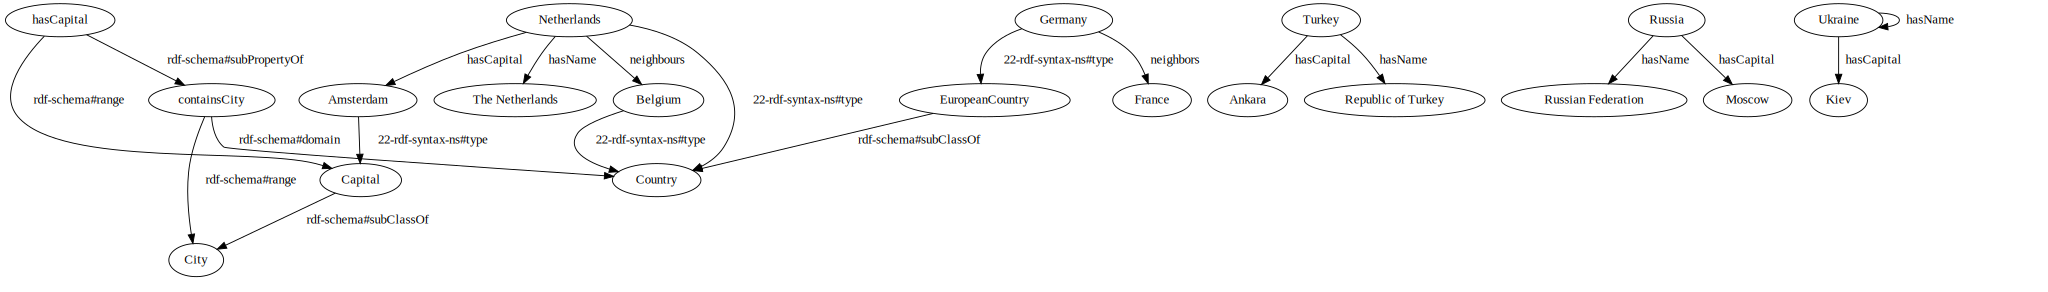

In [13]:
print(dot.source)
dot  # try dot.view() if this does not produce anything (or paste the source at www.webgraphviz.com)

### - Task 3b: (10 Points) From RDF to .dot with "semantic information"

There is a conceptual distinction between properties, instances and classes (sets of instances). A simple way of checking is the following

1. in a triple (s a o), with predicate a (which is a special abbreviation for the predicate rdf:type), the s is an Instance, and o is a Class. 
2. in a triple (s rdfs:subClassOf o) both s and o are Classes. 
3. in a triple (p rdfs:domain o) p is a Property and o is a Class. 
4. in a triple (p rdfs:range o)  p is a Property and o is a Class. 

Update the .dot representation for an RDF graph that:

- renders all predicates that are defined in the RDF namespace as dotted lines,
- renders all classes as rectangles,
- renders all literals as plain text (no enclosure), and
- renders all entities with the color blue. 

Check how your graph looks once finished. Hint: you can use the `color`, `shape` and `style` attributes in the node and edge function (see the documentation).

strict digraph {
	graph [dpi=75]
	Amsterdam -> Capital [label="22-rdf-syntax-ns#type"]
	hasCapital -> containsCity [label="rdf-schema#subPropertyOf"]
	Belgium -> Country [label="22-rdf-syntax-ns#type"]
	Turkey -> Ankara [label=hasCapital]
	Russia -> "Russian Federation" [label=hasName]
	Russia -> Moscow [label=hasCapital]
	Netherlands -> Belgium [label=neighbours]
	Germany -> France [label=neighbors]
	hasCapital -> Capital [label="rdf-schema#range"]
	containsCity -> City [label="rdf-schema#range"]
	Ukraine -> Kiev [label=hasCapital]
	Capital -> City [label="rdf-schema#subClassOf"]
	Ukraine -> Ukraine [label=hasName]
	EuropeanCountry -> Country [label="rdf-schema#subClassOf"]
	Netherlands -> Amsterdam [label=hasCapital]
	containsCity -> Country [label="rdf-schema#domain"]
	Turkey -> "Republic of Turkey" [label=hasName]
	Netherlands -> Country [label="22-rdf-syntax-ns#type"]
	Germany -> EuropeanCountry [label="22-rdf-syntax-ns#type"]
	Netherlands -> "The Netherlands" [label=hasName]
	Ams

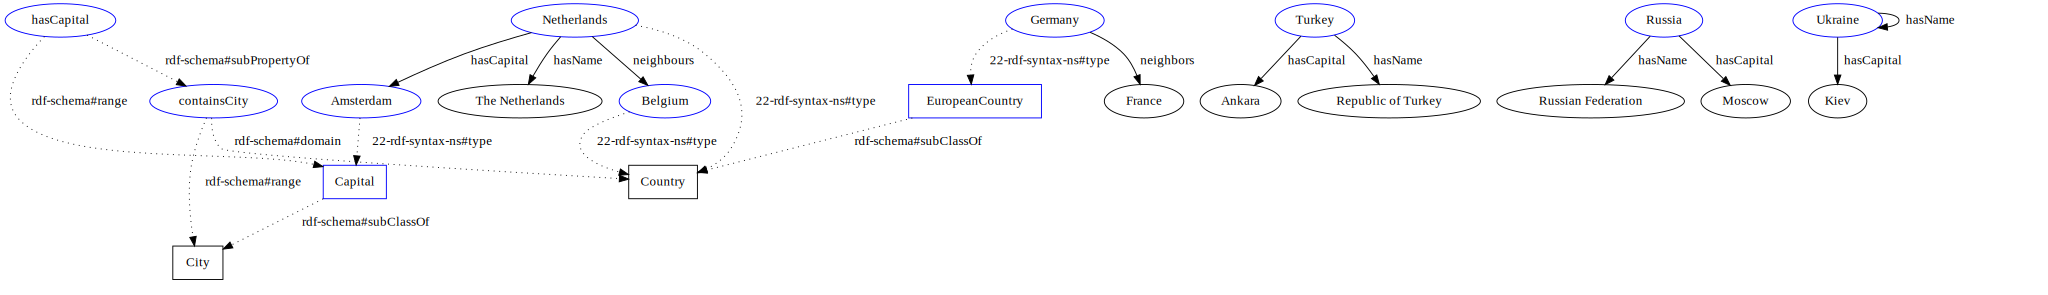

In [14]:
for s,p,o in g:
    dot.node(strip(s), color="blue")  # all subjects are entities
    if "rdf" in p:
        if strip(p) == "type":
            dot.node(strip(o), shape = "rectangle")
        
        elif "subClassOf" in strip(p):
            dot.node(strip(s), shape = "rectangle")
            dot.node(strip(o), shape = "rectangle")

       
        dot.edge(strip(s),strip(o), strip(p), style = "dotted")

print(dot)
dot


### - Task 4: (10 Points) Deriving implicit knowledge (a bit of schema)

We will look into Schema information in the latter modules, but let us try already to find some implicit information in a first bit of inferencing: whenever there are two statements (s rdf:type o) and (o rdfs:subClassOf o2) we can derive (and later prove) that (s rdf:type o2). 

Write a procedure that adds all implied triples to our knowledge graph, and which prints each implied triple.

In [94]:
%pip install regex

Note: you may need to restart the kernel to use updated packages.


In [19]:
from typing import Tuple

type_statements: List[Tuple[str, str, str]] = []
subclass_statements: List[Tuple[str, str, str]] = []
implied_triples: list = []

for s, p, o in g:
    if "type" in strip(p).lower() and "rdf" in strip(p).lower():
        # print(strip(p))
        type_statements.append((s,p,o))

    elif "subclass" in strip(p).lower():
        subclass_statements.append((s,p,o))


for s1,p1,o1 in type_statements:
    for s2,p2,o2 in subclass_statements:
        if o1 == s2:
            print(f"{strip(s1)} -> {strip(o1)} [{strip(o2)}]")
            g.add((s1,p1,o2))






    


Amsterdam -> Capital [City]
Germany -> EuropeanCountry [Country]


# C. Tasks related to local copies of external RDF Datasets using SPARQL

Until now, we have manipulated local knowledge graphs, but as we claimed in the lectures, the advantage of knowledge graphs is that they can easily be linked with other datasets on the Web. 

In the remaining 3 tasks, we will manipulate data from the Web, and ask complex queries over this web data. 

In the first task, we will access web data, make a local copy of it, and then query it. In the other two tasks, we will query live data directly from web Knowledge Graphs (in this case, the SPARQL endpoint of DBPedia). 

### - Task 5: (10 Points) Show and manipulate data about RDF resources on the Web 

With rdflib we can easily load a local graph, but we can just as well retrieve a graph from the Web. Here, we will do so using the *requests* library, which allows us to fire a request to any server and/or SPARQL endpoint and to capture the response. The following snippet does so for the resource Netherlands from Dbpedia, by using the 'DESCRIBE' keyword to give us all triples about The Netherlands, and then loads it in a RDFlib Graph object. Note that, in the next assignment, we will learn a more high-level approach that hides most of the raw request details.

Should, for some external reason, the code below fail to retrieve the graph from DBpedia, then you can manually load the turtle file `dbpedia_AmsterdamBelgium.ttl` which is located in this directory and which contains the same triples. Only do this as a last resort!

In [96]:
# install the library
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [97]:
import requests

endpoint = "https://dbpedia.org/sparql"
query = 'DESCRIBE <http://dbpedia.org/resource/Netherlands>'

payload = {'query':query, 'format':'text/turtle'}
response = requests.post(endpoint, data = payload)

g = Graph()
g.parse(data=response.text, format='ttl')
print(g)

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].


Now do the same for Belgium

In [98]:
query = 'DESCRIBE <http://dbpedia.org/resource/Belgium>'

payload = {'query':query, 'format':'text/turtle'}
response = requests.post(endpoint, data = payload)

g.parse(data=response.text, format='ttl')  # calling parse again merges the graphs

<Graph identifier=Nfca2a7ad057f48be9744216e043898c3 (<class 'rdflib.graph.Graph'>)>

Let us start by showing diverse bits of information w.r.t  The Netherlands and Belgium in DBPedia. It is very similar to task 1, but now with Web Data. 

First, query the graph g (now containing the DBPedia information about both countries) and check which motor ways cross both countries.

In [99]:
qres = g.query(
   """
    PREFIX dbr: <http://dbpedia.org/resource/>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    SELECT ?s
        WHERE {
            ?s a dbo:Road ;
               dbo:country dbr:Netherlands ;
               dbo:country dbr:Belgium .
        }
        LIMIT 10
       """)
for row in qres:
    print(row)

Write a query to check whether you can find someone who was born in The Netherlands and died in Belgium? You need to look at the data to know which property you should check for. 

To get an intuition of what is in the knowledge graph you might want to look at the human readable rendering on : http://dbpedia.org/resource/Netherlands

In [100]:
# Your code here
qres = g.query(
    """  
    PREFIX dbr: <http://dbpedia.org/resource/>
    PREFIX dbo: <http://dbpedia.org/ontology/>

    SELECT ?s 
        WHERE {
            ?s dbo:birthPlace dbr:Netherlands;
                dbo:deathPlace dbr:Belgium.
        }
        LIMIT 10
        """
)

for row in qres:
    print(row)

(rdflib.term.URIRef('http://dbpedia.org/resource/Ben_van_der_Voort'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/Bram_Bart'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/Petrus_van_Schendel'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/Maximilian_von_Fürstenberg'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/Salomon_Zeldenrust'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/Co_Prins'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/Cornelius_van_Zierikzee'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/Theo_Middelkamp'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/Anne_Vondeling'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/Anton_Winterink'),)


### - Task 6: (20 Points) Ask SPARQL against live data using Yasgui

Yasgui (https://yasgui.triply.cc) is a nice graphical interface for asking queries.

Run a new query against http://dbpedia.org/sparql that does the following:

- Find all languages spoken in countries that are not official languages of that country.
- The query should return two colums: the country, and the number of languages.
- Order the countries by the number of unofficial languages, from high to low.

Note that
- Countries are assumed to be of type `dbo:Country`
- Languages are assumed to be of type `dbo:Language` (and can be linked by many different predicates)
- Official languages are linked using predicate `dbo:officialLanguage`
- Not all countries have an official language (in which case we return all linked languages)

Hint: there is more than one possible solution. See https://www.w3.org/TR/sparql11-query/ for documentation on SPARQL.

In [101]:
'''
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbo: <http://dbpedia.org/ontology/>
SELECT ?country (COUNT(?language) as ?languageCount) WHERE {
  ?country a dbo:Country.
  ?language a dbo:Language.
  ?country dbo:officialLanguage ?language.
}
GROUP BY ?country
ORDER BY desc(?languageCount)
LIMIT 100
'''

'\nPREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>\nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX dbr: <http://dbpedia.org/resource/>\nPREFIX dbo: <http://dbpedia.org/ontology/>\nSELECT ?country (COUNT(?language) as ?languageCount) WHERE {\n  ?country a dbo:Country.\n  ?language a dbo:Language.\n  ?country dbo:officialLanguage ?language.\n}\nGROUP BY ?country\nORDER BY desc(?languageCount)\nLIMIT 100\n'